# 4-8 DECEMBER WALKING DATA ANALYSIS

In [141]:
from __future__ import print_function, division
%matplotlib inline

# import used packages and modules
# import display function to display the table of the pandas dataframe
from IPython.display import display

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

from scipy import signal

import datetime
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import csv


In [142]:
data_dir = '../data/meadows_december/'

data04 = pd.read_csv(data_dir+'meadows-2017-12-04.csv')
data05 = pd.read_csv(data_dir+'meadows-2017-12-05.csv')
data06 = pd.read_csv(data_dir+'meadows-2017-12-06.csv')
data07 = pd.read_csv(data_dir+'meadows-2017-12-07.csv')
data08 = pd.read_csv(data_dir+'meadows-2017-12-08.csv')

data = pd.concat([data04, data05, data06, data07,
                  data08], ignore_index=True).sort_values('phoneTimestamp')
display(data)

,phoneTimestamp,pm1,pm2_5,pm10,temperature,humidity,bin0,bin1,bin2,bin3,...,bin11,bin12,bin13,bin14,bin15,total,gpsLongitude,gpsLatitude,gpsAltitude,gpsAccuracy
0,1512412799389,0.000000,0.000000,0.000000,NaN,NaN,12336,0,0,0,...,0,0,0,0,0,12336,-3.183947,55.945227,137.0,8.0
1,1512412820119,0.000000,0.000000,0.000000,17.000000,51.400000,0,0,0,0,...,0,0,0,0,0,0,-3.183896,55.945287,141.0,10.0
2,1512414079425,0.000000,0.000000,0.000000,17.600000,54.500000,12336,0,0,0,...,0,0,0,0,0,12336,-3.183945,55.945292,143.0,38.0
3,1512414080717,0.000000,0.000000,0.000000,17.500000,54.500000,12336,0,0,0,...,0,0,0,0,0,12336,-3.183945,55.945292,143.0,38.0
4,1512414099538,0.000000,0.000000,0.000000,17.500000,54.500000,0,0,0,0,...,0,0,0,0,0,0,-3.183979,55.945296,142.0,14.0
5,1512414120293,33.472490,40.908604,41.178135,17.400000,54.700000,3247,1148,504,135,...,0,0,0,0,0,5068,-3.184082,55.945118,138.0,6.0
6,1512414141703,11.779354,15.713491,16.466698,17.100000,51.000000,966,409,258,108,...,0,0,0,0,0,1780,-3.184135,55.944876,142.0,12.0
7,1512414161821,4.005422,5.602231,6.469329,16.800001,50.300000,352,115,100,45,...,0,0,0,0,0,639,-3.183867,55.944693,158.0,8.0
8,1512414181925,1.454933,2.256311,10.667744,16.400000,50.900000,137,40,25,20,...,2,0,0,0,0,249,-3.183715,55.944409,151.0,8.0
9,1512414204628,1.212938,1.813488,3.479011,16.000000,51.400000,119,33,19,20,...,0,0,0,0,0,213,-3.183429,55.943987,140.0,7.0


In [143]:
def get_time_from_timestamp(timestamp):
    return datetime.datetime.fromtimestamp(timestamp/1000.).time()

### SPLIT MIDDAY AND AFTERNOON DATA

In [144]:
# add a time column in order to filter data based on time
data['time'] = data['phoneTimestamp'].apply(lambda x: get_time_from_timestamp(x))

sorted_data = data.sort_values('time').reset_index()

midday_data = sorted_data[sorted_data['time'] < datetime.time(15+2)]
afternoon_data = sorted_data[(sorted_data['time'] >= datetime.time(15+2)) & 
                             (sorted_data['time'] <= datetime.time(19+2))]

display(sorted_data)

,index,phoneTimestamp,pm1,pm2_5,pm10,temperature,humidity,bin0,bin1,bin2,...,bin12,bin13,bin14,bin15,total,gpsLongitude,gpsLatitude,gpsAltitude,gpsAccuracy,time
0,247,1512477694848,0.000000,0.000000,0.000000,21.900000,36.800000,12336,0,0,...,0,0,0,0,12336,-3.184069,55.945031,124.000000,11.000,14:41:34.848000
1,248,1512477759716,1.654384,2.637642,3.139737,21.300001,39.400000,163,40,35,...,0,0,0,0,299,-3.184027,55.944608,121.000000,10.000,14:42:39.716000
2,249,1512477780469,1.430278,2.373560,3.725970,19.900000,40.300000,123,40,26,...,0,0,0,0,253,-3.183969,55.944341,124.000000,10.000,14:43:00.469000
3,250,1512477801232,1.824667,2.890167,3.376095,19.100000,41.100002,132,54,51,...,0,0,0,0,294,-3.183656,55.944074,130.000000,12.000,14:43:21.232000
4,251,1512477821342,1.627125,2.831027,10.557020,18.200000,43.100002,124,43,38,...,0,0,1,0,277,-3.183593,55.943733,127.000000,9.000,14:43:41.342000
5,252,1512477842103,1.338924,2.425342,3.373458,17.800001,43.900000,98,25,42,...,0,0,0,0,228,-3.183462,55.943397,137.000000,4.000,14:44:02.103000
6,253,1512477862864,1.493604,2.655773,4.294694,15.700000,47.000000,105,39,29,...,0,0,0,0,246,-3.183308,55.943151,134.000000,5.000,14:44:22.864000
7,254,1512477883622,1.328693,2.447038,3.405040,13.600000,53.700000,87,43,29,...,0,0,0,0,226,-3.183092,55.942933,137.000000,3.900,14:44:43.622000
8,255,1512477903738,1.574792,2.748280,7.485271,13.600000,53.700000,119,44,32,...,0,0,0,0,267,-3.182836,55.942758,134.000000,10.000,14:45:03.738000
9,256,1512477923846,1.568479,2.733824,4.433143,13.700000,53.000000,119,45,35,...,0,0,0,0,271,-3.182583,55.942515,133.000000,10.000,14:45:23.846000


### PLOTTING TIME SERIES METHOD

In [145]:
# time series plot
def time_series_plot(dataset):
    # midday times
    times = list(map(lambda x: datetime.datetime.strptime(str(x), '%H:%M:%S.%f'), dataset[0][0]['time']))

    # graphs initialisation
    f, ax = plt.subplots(1,1, figsize=(15,10))
    for d, key, label in dataset:
        if key != '':
            ax.plot(times, d[key], label=label)
        else:
            ax.plot(times, d, label=label)
    ax.set_xlabel('Time')
    ax.set_ylabel('Values')
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
    plt.xticks(rotation=60)
    ax.legend()
    plt.show()

## Plot Of All Data (PM VALS)

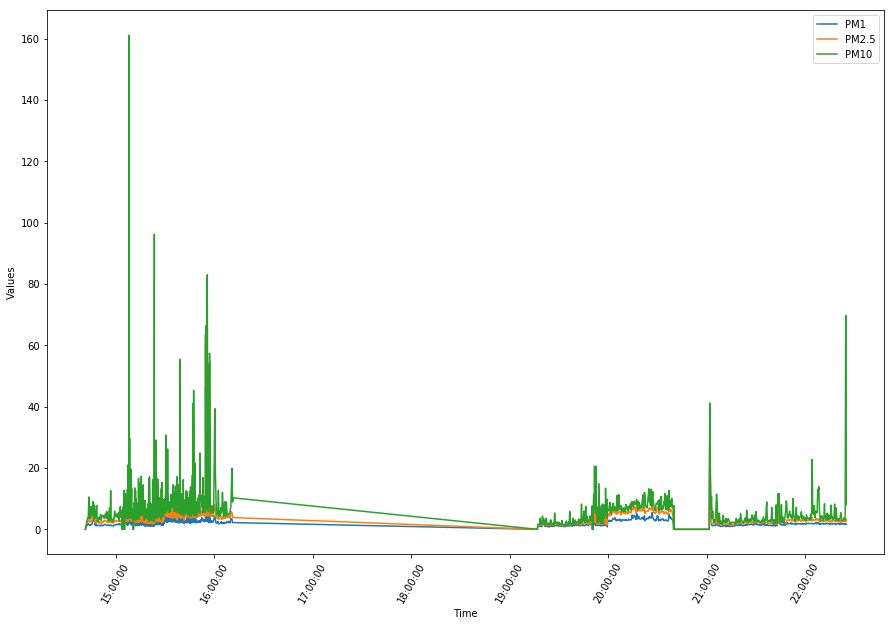

In [146]:
time_series_plot([
    (sorted_data, 'pm1', 'PM1'),
    (sorted_data, 'pm2_5', 'PM2.5'),
    (sorted_data, 'pm10', 'PM10'),
])

## Midday Data

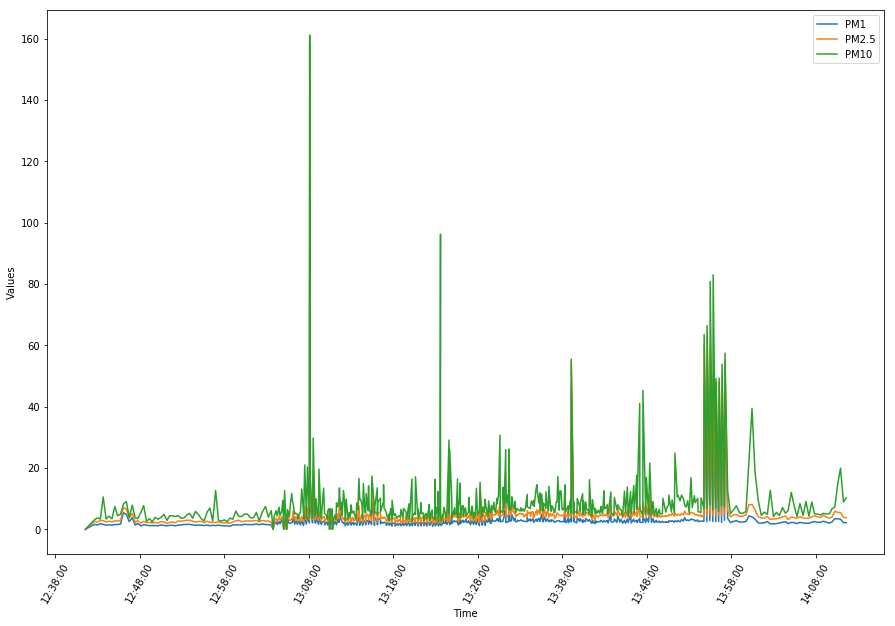

In [177]:
time_series_plot([
    (midday_data, 'pm1', 'PM1'),
    (midday_data, 'pm2_5', 'PM2.5'),
    (midday_data, 'pm10', 'PM10'),
])

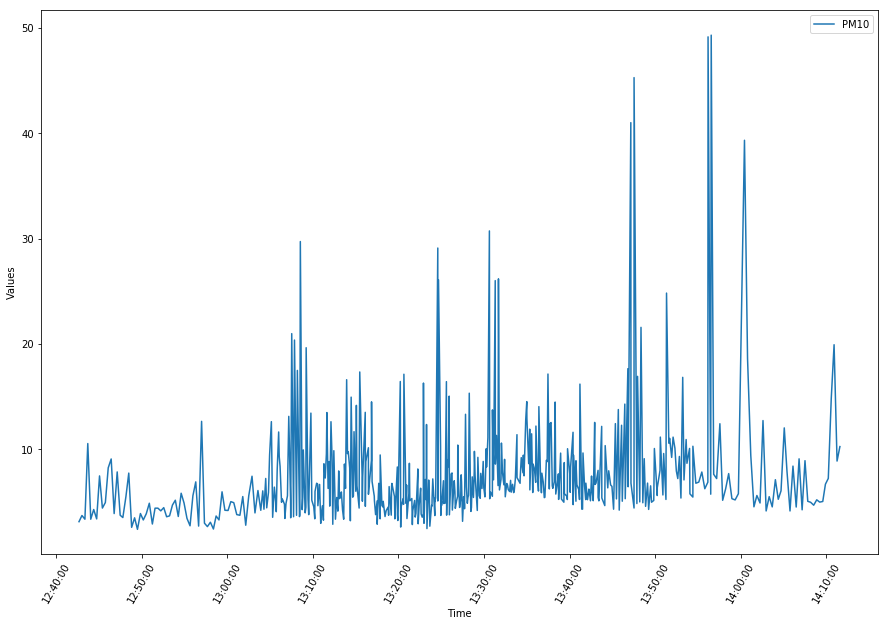

In [178]:
filtered_data = midday_data[(midday_data['pm10']<50) & (midday_data['pm10']>0)]

time_series_plot([
    (filtered_data, 'pm10', 'PM10')
])

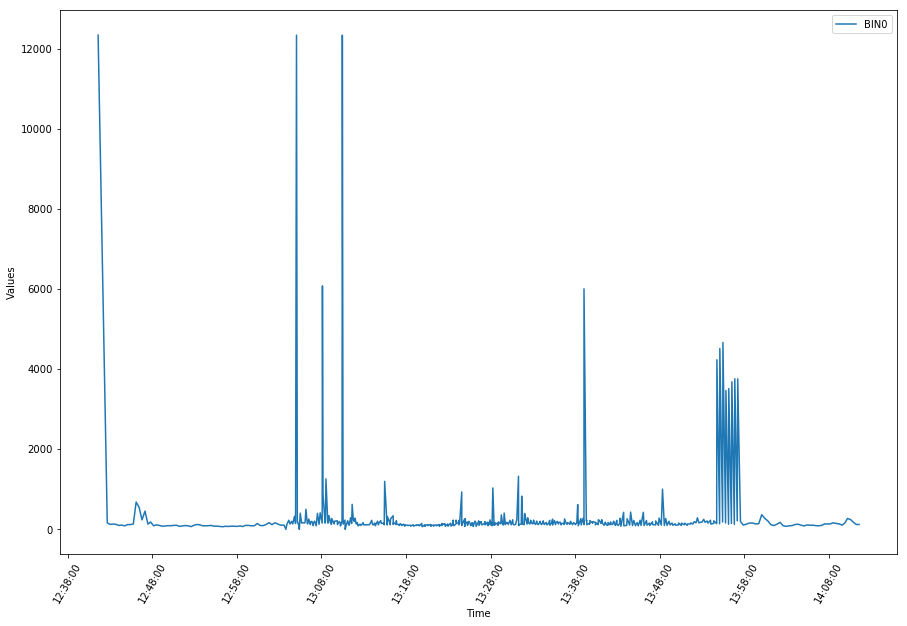

In [179]:
time_series_plot([
    (midday_data, 'bin0', 'BIN0')
])

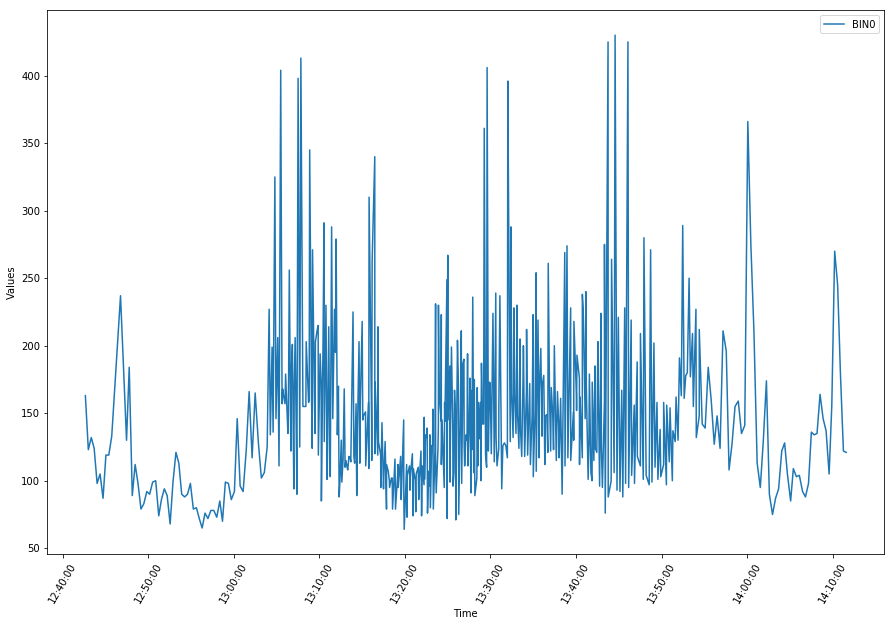

In [180]:
filtered_data = midday_data[(midday_data['bin0']<450) & (midday_data['bin0']>0)]

time_series_plot([
    (filtered_data, 'bin0', 'BIN0'),
])


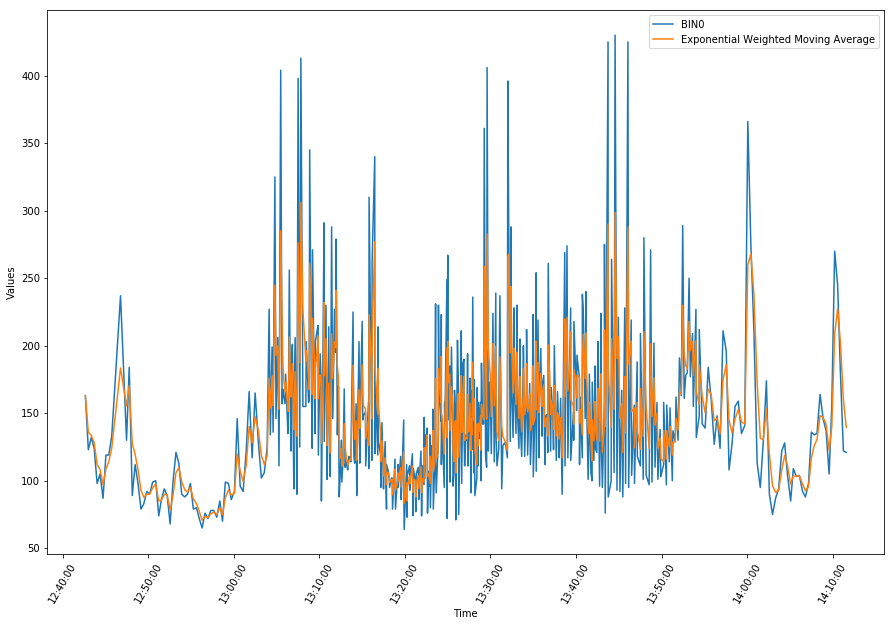

In [181]:
filtered_data = midday_data[(midday_data['bin0']<450) & (midday_data['bin0']>0)]

time_series_plot([
    (filtered_data, 'bin0', 'BIN0'),
    (filtered_data['bin0'].ewm(com=0.9).mean(), '', 'Exponential Weighted Moving Average'),
])



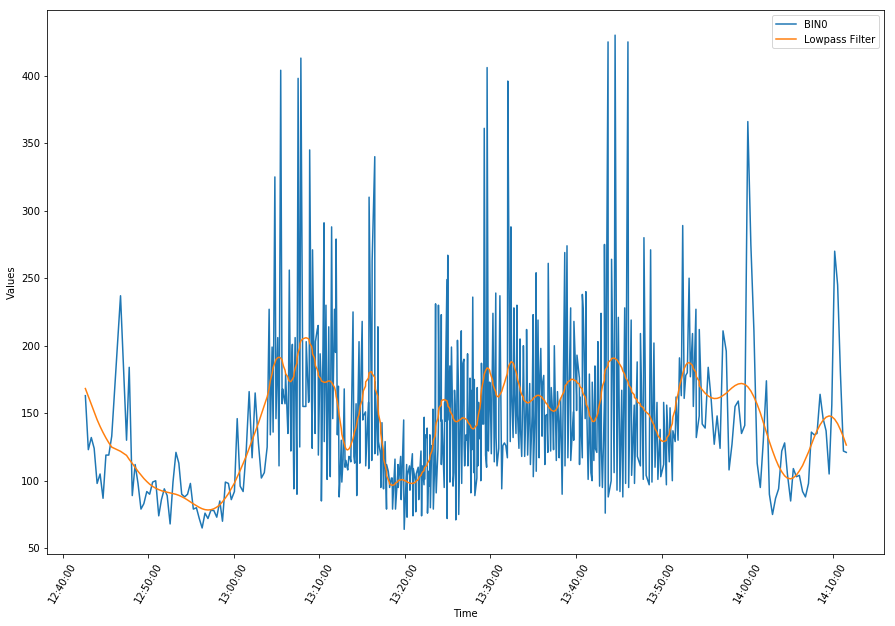

In [182]:
filtered_data = midday_data[(midday_data['bin0']<450) & (midday_data['bin0']>0)]

# create an order 3 lowpass butterworth filter
b, a = signal.butter(3, 0.08)

y = signal.filtfilt(b, a, filtered_data['bin0'])

time_series_plot([
    (filtered_data, 'bin0', 'BIN0'),
    (y, '', 'Lowpass Filter')
])

## Afternoon Data

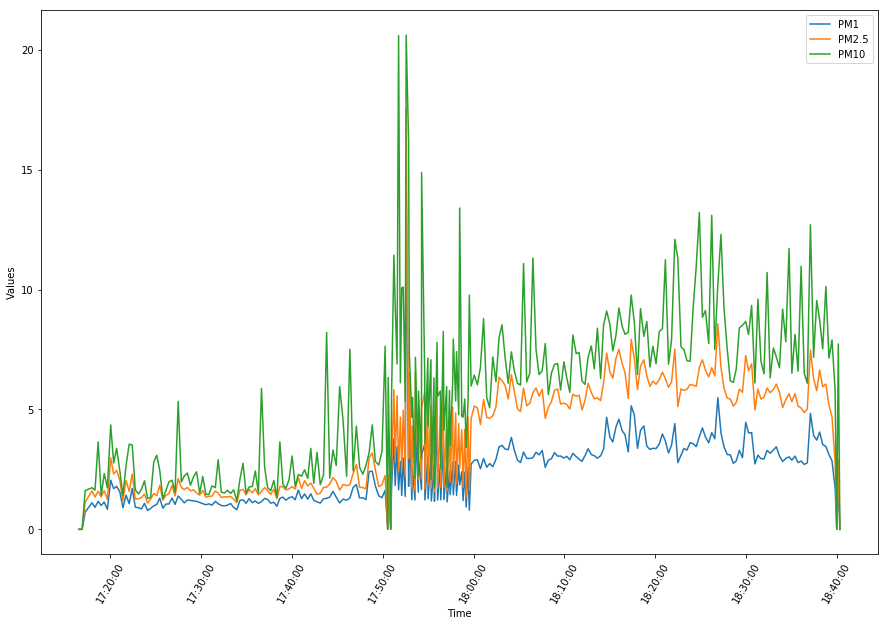

In [183]:
time_series_plot([
    (afternoon_data, 'pm1', 'PM1'),
    (afternoon_data, 'pm2_5', 'PM2.5'),
    (afternoon_data, 'pm10', 'PM10'),
])

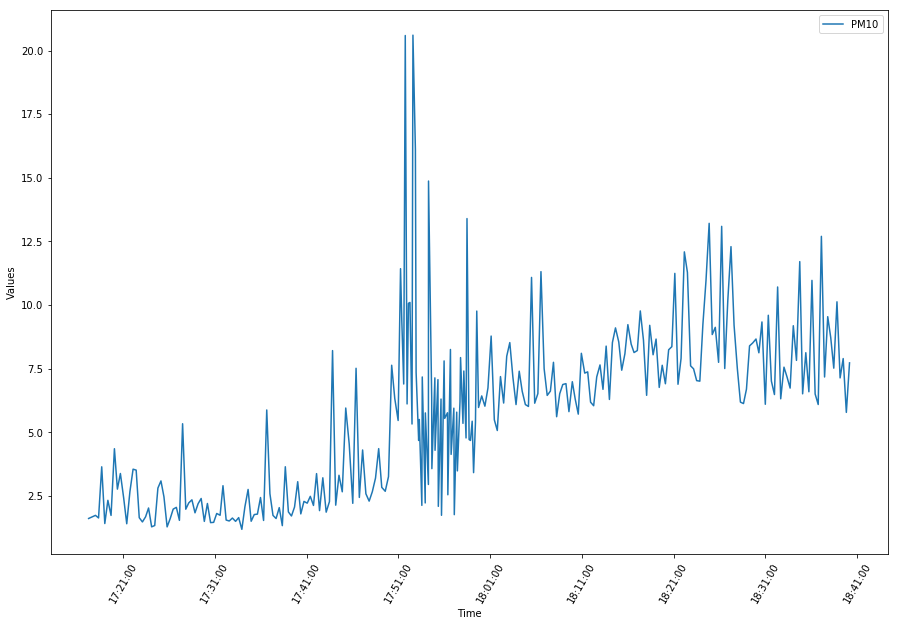

In [184]:
filtered_data = afternoon_data[(afternoon_data['pm10']<50) & (afternoon_data['pm10']>0)]

time_series_plot([
    (filtered_data, 'pm10', 'PM10')
])

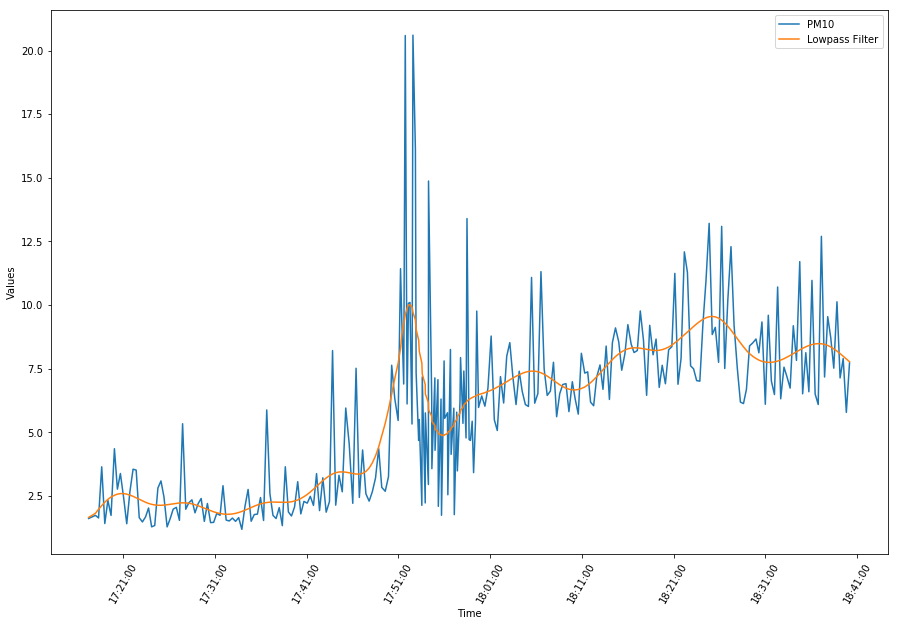

In [185]:
filtered_data = afternoon_data[(afternoon_data['pm10']<50) & (afternoon_data['pm10']>0)]

# create an order 3 lowpass butterworth filter
b, a = signal.butter(3, 0.08)

y = signal.filtfilt(b, a, filtered_data['pm10'])

time_series_plot([
    (filtered_data, 'pm10', 'PM10'),
    (y, '', 'Lowpass Filter')
])

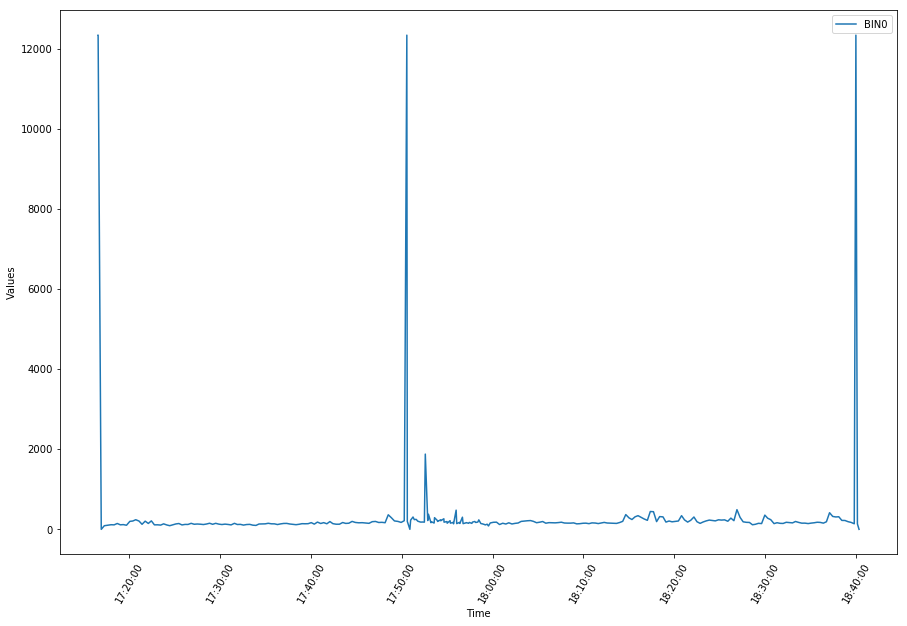

In [186]:
time_series_plot([
    (afternoon_data, 'bin0', 'BIN0')
])

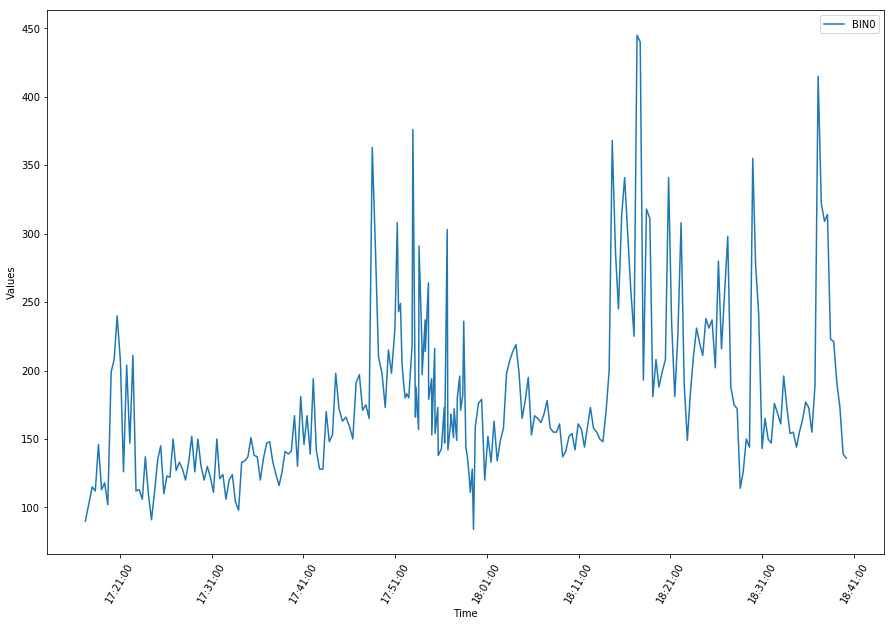

In [187]:
filtered_data = afternoon_data[(afternoon_data['bin0']<450) & (afternoon_data['bin0']>0)]

time_series_plot([
    (filtered_data, 'bin0', 'BIN0')
])

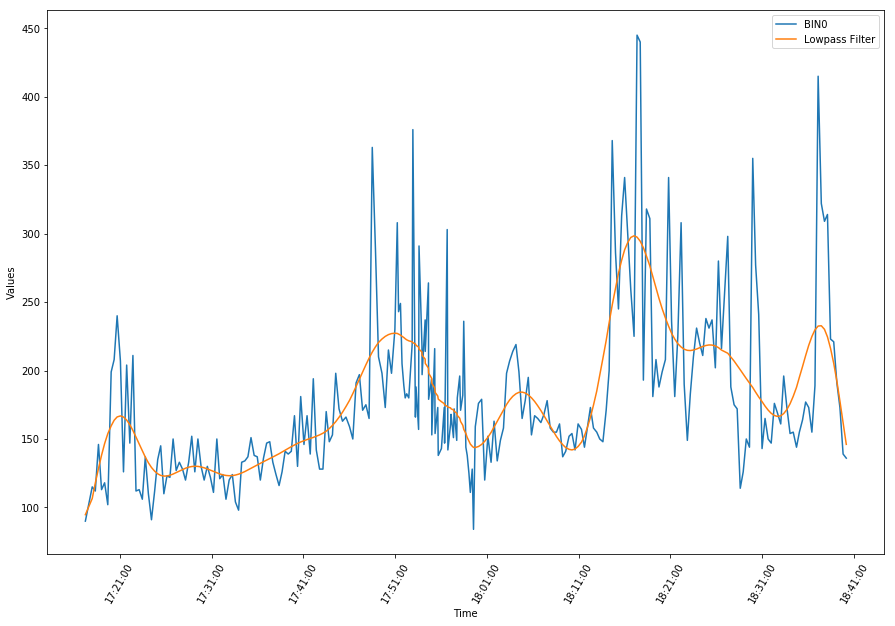

In [188]:
filtered_data = afternoon_data[(afternoon_data['bin0']<450) & (afternoon_data['bin0']>0)]

# create an order 3 lowpass butterworth filter
b, a = signal.butter(3, 0.08)

y = signal.filtfilt(b, a, filtered_data['bin0'])

time_series_plot([
    (filtered_data, 'bin0', 'BIN0'),
    (y, '', 'Lowpass Filter')
])

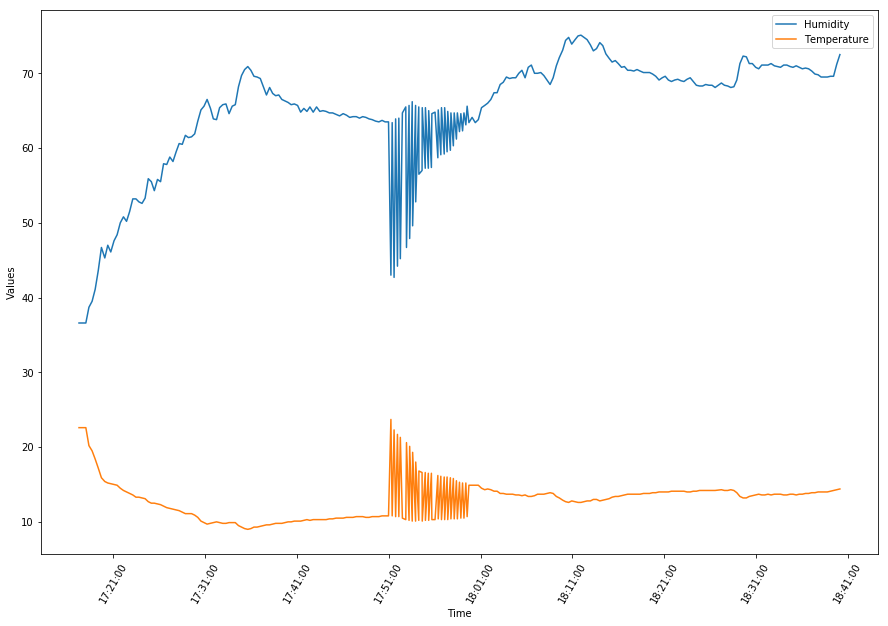

In [7]:
filtered_data = afternoon_data[(afternoon_data['bin0']<450) & (afternoon_data['bin0']>0)]

time_series_plot([
    (filtered_data, 'humidity', 'Humidity'),
    (filtered_data, 'temperature', 'Temperature')
])

# KMEANS CLUSTERING BASED ON LOCATION

In [153]:
# method to get the cluster means of the data points based on coordinates
# and the queried columns
def get_location_cluster_means(data, cluster_no, cols):
    # obtain indices of clusters
    kmeans = KMeans(n_clusters=cluster_no, random_state=0)
    # remove data rows with null coordinates
    data = data[~np.isnan(data['gpsLatitude'])]
    # get the indices of the location based clusters
    indices = kmeans.fit_predict(data[['gpsLatitude', 'gpsLongitude']])
    freqs = np.bincount(indices)
    # initialise means of queried columns
    means = np.zeros((cluster_no, len(cols)))
    # assign clustered_indices to dataframe
    data['clustered_index'] = indices
    # compute means of queried columns
    for index in np.unique(indices):
        means[index] = np.mean(data[data['clustered_index'] == index][cols])
    return means, data

In [154]:
# method to get the clusters of the environments corresponding to the 5 environments based on
# the queried columns and number of location clusters
def get_environment_clusters(data, cluster_no, cols):
    means, d = get_location_cluster_means(data, cluster_no, cols)
    # we have 5 clusters corresponding to 5 different environments
    environment_kmeans = KMeans(n_clusters=5, random_state=0)
    # predict the cluster indices
    environment_indices = environment_kmeans.fit_predict(means)
    # append the indices to the dataframe
    d['environment_index'] = environment_indices[d['clustered_index']]
    return d

## Midday data

In [161]:
filtered_data = midday_data[(midday_data['bin0']<450) & (midday_data['bin0']>0)].copy()

# get clusters based on bin counts
labelled_midday_data = get_environment_clusters(filtered_data, 80, ['bin0', 'bin1', 'bin2'])

labelled_midday_data

,index,phoneTimestamp,pm1,pm2_5,pm10,temperature,humidity,bin0,bin1,bin2,...,bin14,bin15,total,gpsLongitude,gpsLatitude,gpsAltitude,gpsAccuracy,time,clustered_index,environment_index
1,248,1512477759716,1.654384,2.637642,3.139737,21.300001,39.400000,163,40,35,...,0,0,299,-3.184027,55.944608,121.000000,10.000,14:42:39.716000,72,2
2,249,1512477780469,1.430278,2.373560,3.725970,19.900000,40.300000,123,40,26,...,0,0,253,-3.183969,55.944341,124.000000,10.000,14:43:00.469000,72,2
3,250,1512477801232,1.824667,2.890167,3.376095,19.100000,41.100002,132,54,51,...,0,0,294,-3.183656,55.944074,130.000000,12.000,14:43:21.232000,23,2
4,251,1512477821342,1.627125,2.831027,10.557020,18.200000,43.100002,124,43,38,...,1,0,277,-3.183593,55.943733,127.000000,9.000,14:43:41.342000,55,1
5,252,1512477842103,1.338924,2.425342,3.373458,17.800001,43.900000,98,25,42,...,0,0,228,-3.183462,55.943397,137.000000,4.000,14:44:02.103000,55,1
6,253,1512477862864,1.493604,2.655773,4.294694,15.700000,47.000000,105,39,29,...,0,0,246,-3.183308,55.943151,134.000000,5.000,14:44:22.864000,4,4
7,254,1512477883622,1.328693,2.447038,3.405040,13.600000,53.700000,87,43,29,...,0,0,226,-3.183092,55.942933,137.000000,3.900,14:44:43.622000,4,4
8,255,1512477903738,1.574792,2.748280,7.485271,13.600000,53.700000,119,44,32,...,0,0,267,-3.182836,55.942758,134.000000,10.000,14:45:03.738000,38,4
9,256,1512477923846,1.568479,2.733824,4.433143,13.700000,53.000000,119,45,35,...,0,0,271,-3.182583,55.942515,133.000000,10.000,14:45:23.846000,38,4
10,257,1512477944609,1.713401,2.808682,4.960773,13.700000,52.700000,133,51,44,...,0,0,292,-3.182353,55.942251,135.000000,10.000,14:45:44.609000,57,0


## Afternoon data

In [162]:
filtered_data = afternoon_data[(afternoon_data['bin0']<450) & (afternoon_data['bin0']>0)].copy()

# get clusters based on bin counts
labelled_afternoon_data = get_environment_clusters(filtered_data, 80, ['bin0', 'bin1', 'bin2'])

labelled_afternoon_data

,index,phoneTimestamp,pm1,pm2_5,pm10,temperature,humidity,bin0,bin1,bin2,...,bin14,bin15,total,gpsLongitude,gpsLatitude,gpsAltitude,gpsAccuracy,time,clustered_index,environment_index
545,384,1512494234823,0.726322,1.132936,1.613412,22.600000,36.600002,90,15,12,...,40962,16802,152492,-3.183815,55.944554,133.0,7.000,19:17:14.823000,53,0
546,385,1512494279584,1.103632,1.603872,1.735623,22.600000,36.600002,115,27,21,...,0,0,191,-3.183593,55.943979,131.0,10.000,19:17:59.584000,30,0
547,386,1512494299696,0.917560,1.347808,1.634534,20.200000,38.700000,112,15,12,...,0,0,168,-3.183503,55.943675,131.0,10.000,19:18:19.696000,30,0
548,387,1512494320456,1.168593,1.591988,3.643484,19.500000,39.500000,146,23,14,...,0,0,204,-3.183450,55.943427,129.0,7.000,19:18:40.456000,30,0
549,388,1512494340573,0.994460,1.355132,1.414505,18.400000,41.100002,113,22,12,...,0,0,170,-3.183222,55.943134,131.0,8.000,19:19:00.573000,4,0
550,389,1512494360684,1.138482,1.614811,2.326961,17.200000,43.600002,118,29,18,...,0,0,191,-3.182921,55.943043,130.0,7.000,19:19:20.684000,4,0
551,390,1512494381443,0.836219,1.251661,1.733554,15.900001,46.700000,102,17,11,...,0,0,158,-3.182456,55.942794,135.0,8.000,19:19:41.443000,42,0
552,391,1512494403494,2.046156,2.980184,4.354674,15.400001,45.300000,199,60,46,...,0,0,349,-3.182241,55.942398,140.0,10.000,19:20:03.494000,42,0
553,392,1512494422959,1.696196,2.302913,2.766607,15.200000,47.000000,208,43,20,...,0,0,305,-3.182094,55.942168,132.0,4.000,19:20:22.959000,21,3
554,393,1512494442514,1.791729,2.459568,3.380456,15.100000,46.100002,240,49,14,...,0,0,346,-3.181972,55.942099,136.0,11.000,19:20:42.514000,21,3
